# Springboard Project: Emerging Business Opportunities



## Background:

Our client (Manufacturer A) is a leading Food & Beverage manufacturer. Client wants to understand the growth patterns of consumer preferences (themes) and evaluate positioning of their brand across different themes. Client also wants to know the sales drivers of their products.

## Data:

Client will provide the following data for the project:

●	Sales Data – At UPC level for both Client and Competitors

●	Social Media Data – Mentions of theme across all Social media Platforms

●	Google Search Data – Search volume of the Theme

●	Theme_Product_List – Product to theme Mapping

●	Product_Manufacturer_List – Product to Manufacturer Mapping

●	Theme List – Theme Names


## Deliverables:

### Data Preparation from available sources

Demonstrates:

●	Merge the required data sources

●	Provide the list of themes available across all data sources

●	Understands consumer preference(themes) available in each data source

●	Provide a report for data sufficiency, sparsity and anomalies in each data source


### Exploratory data analysis

Demonstrates:

●	Understand the overall market share of our client

●	Find the potential competitors for our client in each theme

●	Is there a Trend/Seasonality across themes

●	Identify top 5 themes with the highest business opportunity (this Is subjective. Back up your top 5 with valid reasoning)


### Build the sales model and identify the driver of sales (Theme Level)

Demonstrates:

●	Perform appropriate data transformation/aggregation to build models

●	Create a dependent variable by aggregating sales of our client to corresponding theme level

●	Estimate the impact on sales due to social trends, search trends, own price and competitor effects

●	Identify the right model technique and select the suitable variables

●	Justify the estimated impacts are accurate

o	Model Performance

o	Hold out validation

●	Build the Model only for Top 3 themes




### Recommend levers for business growth

Demonstrates:

●	What are the controllable factors that could be leveraged by the client to increase sales across 
themes?

●	How to achieve a 5% increase in sales overall or a specific theme?


### Guidelines from Trainer

->Merge data sources based on your datascience and creative skills. There can be some issues related to date-time, rectify it on your own.

->Mode of presentation will totally depend on you i.e. we can use either Excel, Powerpoint or Jupyter Notebook to present or show it to our trainers.

->EDA should have valid logical reasoning.

->You can do EDA for more than they have asked for. Also try to answer questions for top 5 themes.

->You can also explain seasonality trends for different-different themes in the Eda part.

->Try to group your data based on themes for every product manufactured by different clients.

->Sales Quantity will be the dependent variable for modeling as conveyed by the trainer.

->Also we need to do modeling for top 3 themes for our manufacturer only.

->You don't have to keep total revenue sales or total weight sales as the dependent variable.

->Modeling needs to be done only for our client, you have to think about how competitor affects our sale.So, our dataset should only contain Manufacturer A products.

->Use only OLS model only i.e. simple linear regression model for modeling purpose. Don't use any decision trees or random forest model. Use code templates.

-> For OLS model use regression code templates. Your coefficients should make businees sense otherwise modify your data.

->What are the controllable things that a client can do in order to increase sales.

->Don't go for any optimization technique, try to observe the key drivers of your sale.

### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import pylab

### 2. Importing the dataset

In [2]:
google_search_data = pd.read_csv('reference\data_catalog\google_search_data.csv')
product_manufacturer_list = pd.read_csv('reference\data_catalog\product_manufacturer_list.csv')
sales_data = pd.read_csv('reference\data_catalog\sales_data.csv')
social_media_data = pd.read_excel('reference\data_catalog\social_media_data.xlsx')
Theme_product_list = pd.read_csv('reference\data_catalog\Theme_product_list.csv')
Theme_list = pd.read_csv('reference\data_catalog\Theme_list.csv')

#### google search data

In [3]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014


In [4]:
google_search_data['platform'].value_counts()

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64

#### Most searched Platforms

In [5]:
google_search_data['platform'].unique()

array(['google', 'chewy', 'amazon', 'walmart'], dtype=object)

In [6]:
google_search_data['platform'].nunique()

4

In [7]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [8]:
google_search_data.isna().sum()

date            0
platform        0
searchVolume    0
Claim_ID        0
week_number     0
year_new        0
dtype: int64

First moment business decision

In [9]:
google_search_data.describe()

,searchVolume,Claim_ID,week_number,year_new
count,181565.000000,181565.000000,181565.000000,181565.000000
mean,5823.349318,629.557629,25.169823,2017.013196
std,11251.075181,284.426899,14.613668,1.655898
min,1.000000,8.000000,1.000000,2014.000000
25%,281.000000,516.000000,13.000000,2016.000000
50%,1173.000000,670.000000,25.000000,2017.000000
75%,5539.000000,901.000000,37.000000,2018.000000
max,370484.000000,999.000000,53.000000,2019.000000


second moment business decision

In [10]:
range1 = max(google_search_data.searchVolume)-min(google_search_data.searchVolume)
google_search_data.searchVolume.var(),google_search_data.searchVolume.std(), range1,max(google_search_data.searchVolume)

(126586692.73322006, 11251.07518120913, 370483, 370484)

Third and fourth moment business decision

In [11]:
google_search_data.searchVolume.skew(),google_search_data.searchVolume.kurt()

(3.719983323158315, 24.00254851189155)

plots

((array([-4.47516489, -4.28186585, -4.1769177 , ...,  4.1769177 ,
          4.28186585,  4.47516489]),
  array([     1,      1,      1, ..., 197772, 259069, 370484], dtype=int64)),
 (8377.696597988464, 5823.349318425908, 0.744596182368985))

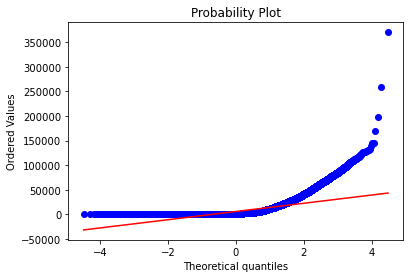

In [12]:
stats.probplot(google_search_data.searchVolume, dist='norm', plot=pylab)

((array([-4.47516489, -4.28186585, -4.1769177 , ...,  4.1769177 ,
          4.28186585,  4.47516489]),
  array([ 0.        ,  0.        ,  0.        , ..., 12.19487013,
         12.46484971, 12.82256554])),
 (2.0305060833871362, 7.06060120264544, 0.9940117251851177))

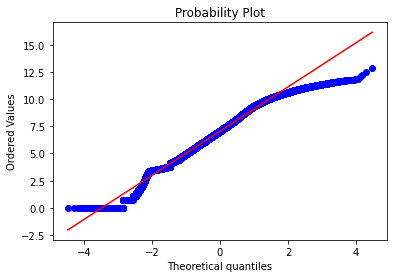

In [13]:
stats.probplot(np.log(google_search_data.searchVolume), dist='norm', plot=pylab)

In [14]:
google_search_data.searchVolume=np.log(google_search_data.searchVolume)

(array([ 1193.,  1236., 10346., 20051., 35447., 43301., 32839., 28028.,
         9040.,    84.]),
 array([ 0.        ,  1.28225655,  2.56451311,  3.84676966,  5.12902622,
         6.41128277,  7.69353932,  8.97579588, 10.25805243, 11.54030898,
        12.82256554]),
 <BarContainer object of 10 artists>)

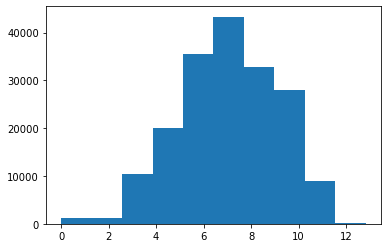

In [15]:
plt.hist(google_search_data.searchVolume)

In [16]:
google_search_data

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,5.855072,916,1,2014
1,06-01-2014,google,5.855072,916,2,2014
2,07-01-2014,google,6.546785,916,2,2014
3,10-01-2014,google,5.855072,916,2,2014
4,20-01-2014,google,6.546785,916,4,2014
...,...,...,...,...,...,...
181560,05-09-2019,walmart,4.828314,980,36,2019
181561,22-09-2019,walmart,4.430817,980,38,2019
181562,26-09-2019,walmart,3.737670,980,39,2019
181563,15-07-2019,walmart,3.737670,622,29,2019


#### Product manufacturer list

In [17]:
product_manufacturer_list.head()

,PRODUCT_ID,Vendor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN


In [18]:
product_manufacturer_list['Vendor'].value_counts()

Others           28335
Private Label    21539
A                 5584
B                 5371
D                 2780
H                 1733
F                 1379
G                  230
E                  224
Name: Vendor, dtype: int64

In [19]:
product_manufacturer_list.isna().sum()

PRODUCT_ID        0
Vendor            0
Unnamed: 2    67175
Unnamed: 3    67175
Unnamed: 4    67175
Unnamed: 5    67175
Unnamed: 6    67175
dtype: int64

#### Sales data

In [20]:
sales_data.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164


In [21]:
sales_data.isna().sum()

system_calendar_key_N    0
product_id               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
dtype: int64

First moment business decision

In [22]:
sales_data.describe()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
count,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06,4.526182e+06
mean,2.017505e+07,2.885857e+04,2.159454e+04,5.160053e+03,1.715339e+04
std,1.073537e+04,1.531254e+04,7.818057e+04,2.685341e+04,1.273401e+05
min,2.016011e+07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.016123e+07,1.506900e+04,5.230000e+02,8.000000e+01,8.600000e+01
50%,2.017121e+07,2.998100e+04,2.655000e+03,4.030000e+02,6.110000e+02
75%,2.018110e+07,4.151300e+04,1.176500e+04,1.807000e+03,3.770000e+03
max,2.019100e+07,5.731700e+04,4.395964e+06,8.739980e+05,1.100310e+07


second moment business decision

In [23]:
range1 = max(sales_data.sales_dollars_value)-min(sales_data.sales_dollars_value)
sales_data.sales_dollars_value.var(),sales_data.sales_dollars_value.std(), range1,min(sales_data.sales_dollars_value),max(sales_data.sales_dollars_value)

(6112200841.619174, 78180.56562611436, 4395964.0, 0.0, 4395964.0)

In [24]:
sales_data[sales_data['sales_dollars_value']==0]

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
149,20160109,11443,0.0,19,7
400,20160109,46133,0.0,3,1
685,20160109,11589,0.0,24,9
1210,20160109,11707,0.0,43,16
1589,20160109,35076,0.0,4,1
...,...,...,...,...,...
4525626,20181027,46283,0.0,9,2
4525928,20181027,46970,0.0,46,11
4526015,20181027,47155,0.0,1,4
4526119,20181027,47408,0.0,1,0


17662 rows have sales dollar value as zero which doesn't make sense as the sales units and sales pounds value are not zero. if it is considered a free of cost quantity, we are not considering it as it doesn't impact our revenue. Hence removing these 17662 rows.

In [25]:
range1 = max(sales_data.sales_units_value)-min(sales_data.sales_units_value)
sales_data.sales_units_value.var(),sales_data.sales_units_value.std(), range1,min(sales_data.sales_units_value),max(sales_data.sales_units_value)

(721105511.8272831, 26853.407825214348, 873997, 1, 873998)

In [26]:
range1 = max(sales_data.sales_lbs_value)-min(sales_data.sales_lbs_value)
sales_data.sales_lbs_value.var(),sales_data.sales_lbs_value.std(), range1,min(sales_data.sales_lbs_value),max(sales_data.sales_lbs_value)

(16215507277.51426, 127340.12438157212, 11003100, 0, 11003100)

In [27]:
sales_data[(sales_data['sales_lbs_value']==0)]

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
26,20160109,116,3.0,3,0
310,20160109,34090,2.0,1,0
311,20160109,34092,7.0,2,0
314,20160109,34103,12.0,2,0
315,20160109,34106,2.0,1,0
...,...,...,...,...,...
4525735,20181027,46537,1.0,1,0
4525995,20181027,47111,1.0,1,0
4526058,20181027,47263,1.0,1,0
4526089,20181027,47341,1.0,1,0


In [28]:
sales_data.drop(sales_data[sales_data['sales_dollars_value']==0].index, inplace=True)

In [29]:
sales_data.drop(sales_data[sales_data['sales_lbs_value']==0].index, inplace=True)

In [30]:
sales_data

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164
...,...,...,...,...,...
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361


Third and fourth moment business decision

In [31]:
sales_data.sales_dollars_value.skew(),sales_data.sales_dollars_value.kurt()

(13.764275418407543, 379.9675748964544)

In [32]:
sales_data.sales_units_value.skew(), sales_data.sales_units_value.kurt()

(13.284320604051636, 230.13146566492955)

In [33]:
sales_data.sales_lbs_value.skew(), sales_data.sales_lbs_value.kurt()

(30.0116310879485, 1430.7224687868531)

plots

(array([4.001847e+06, 2.060120e+05, 8.790400e+04, 4.736600e+04,
        3.188000e+04, 2.019700e+04, 1.398800e+04, 1.092800e+04,
        8.528000e+03, 6.911000e+03, 5.431000e+03, 4.314000e+03,
        2.955000e+03, 2.261000e+03, 1.920000e+03, 1.585000e+03,
        1.288000e+03, 1.023000e+03, 7.630000e+02, 5.920000e+02,
        5.670000e+02, 6.440000e+02, 5.400000e+02, 4.680000e+02,
        3.860000e+02, 3.110000e+02, 2.780000e+02, 2.090000e+02,
        2.080000e+02, 1.800000e+02, 1.540000e+02, 1.390000e+02,
        1.050000e+02, 6.100000e+01, 4.400000e+01, 6.300000e+01,
        5.500000e+01, 4.200000e+01, 2.700000e+01, 3.400000e+01,
        4.200000e+01, 3.600000e+01, 4.500000e+01, 3.000000e+01,
        2.500000e+01, 1.800000e+01, 1.400000e+01, 1.500000e+01,
        1.200000e+01, 1.600000e+01, 4.000000e+00, 1.400000e+01,
        1.400000e+01, 1.500000e+01, 1.800000e+01, 2.400000e+01,
        1.000000e+01, 1.000000e+01, 1.500000e+01, 1.500000e+01,
        9.000000e+00, 1.500000e+01, 8.00

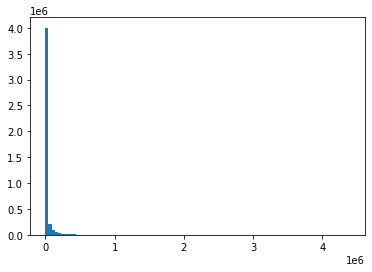

In [34]:
plt.hist(sales_data.sales_dollars_value, bins=100)

(array([4.04587e+06, 1.80854e+05, 7.31820e+04, 3.94280e+04, 2.57560e+04,
        1.66490e+04, 1.24460e+04, 9.28700e+03, 7.22200e+03, 5.88300e+03,
        4.65500e+03, 3.57800e+03, 2.78400e+03, 2.44300e+03, 2.09400e+03,
        1.91300e+03, 1.69000e+03, 1.62000e+03, 1.45400e+03, 1.33600e+03,
        1.25800e+03, 1.41200e+03, 1.34300e+03, 1.14800e+03, 1.07500e+03,
        1.10500e+03, 1.05400e+03, 8.85000e+02, 7.13000e+02, 6.91000e+02,
        6.17000e+02, 6.84000e+02, 6.04000e+02, 5.34000e+02, 5.25000e+02,
        4.46000e+02, 4.56000e+02, 4.20000e+02, 4.21000e+02, 4.37000e+02,
        3.76000e+02, 3.59000e+02, 3.51000e+02, 3.07000e+02, 3.07000e+02,
        2.86000e+02, 2.64000e+02, 2.72000e+02, 2.88000e+02, 2.80000e+02,
        2.43000e+02, 2.06000e+02, 1.87000e+02, 1.53000e+02, 1.28000e+02,
        1.51000e+02, 1.33000e+02, 1.54000e+02, 1.43000e+02, 1.38000e+02,
        1.38000e+02, 1.29000e+02, 1.14000e+02, 1.26000e+02, 1.32000e+02,
        1.58000e+02, 1.46000e+02, 1.64000e+02, 1.29

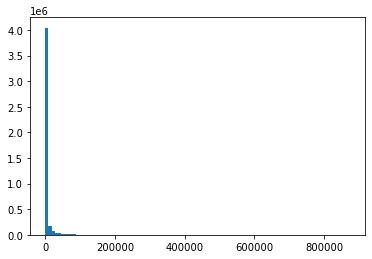

In [35]:
plt.hist(sales_data.sales_units_value, bins=100)

(array([4.3331e+06, 6.0933e+04, 2.4814e+04, 1.2365e+04, 8.2760e+03,
        5.6470e+03, 3.5400e+03, 2.4690e+03, 1.7230e+03, 1.4940e+03,
        1.1620e+03, 1.0940e+03, 9.8300e+02, 9.1100e+02, 7.1800e+02,
        4.0500e+02, 3.2400e+02, 2.8500e+02, 1.9500e+02, 1.6200e+02,
        1.3300e+02, 1.1700e+02, 9.8000e+01, 1.3000e+02, 1.4500e+02,
        1.7500e+02, 1.6500e+02, 1.7000e+02, 1.2300e+02, 9.1000e+01,
        5.0000e+01, 4.6000e+01, 5.2000e+01, 6.1000e+01, 7.0000e+01,
        5.6000e+01, 3.2000e+01, 3.4000e+01, 1.7000e+01, 1.8000e+01,
        3.0000e+01, 1.8000e+01, 1.6000e+01, 1.0000e+00, 9.0000e+00,
        1.5000e+01, 1.5000e+01, 1.1000e+01, 1.2000e+01, 1.6000e+01,
        1.1000e+01, 1.0000e+01, 1.3000e+01, 1.3000e+01, 1.2000e+01,
        1.7000e+01, 1.6000e+01, 1.4000e+01, 1.0000e+01, 1.5000e+01,
        1.0000e+01, 1.1000e+01, 1.2000e+01, 1.5000e+01, 1.1000e+01,
        1.8000e+01, 1.7000e+01, 2.2000e+01, 1.7000e+01, 1.0000e+01,
        1.9000e+01, 1.9000e+01, 1.1000e+01, 9.00

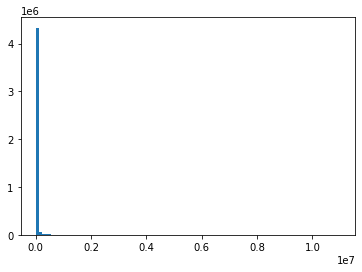

In [36]:
plt.hist(sales_data.sales_lbs_value, bins=100)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 4.375272e+06,
         4.376611e+06, 4.395964e+06])),
 (39989.90353145792, 21900.356324551038, 0.508196260905965))

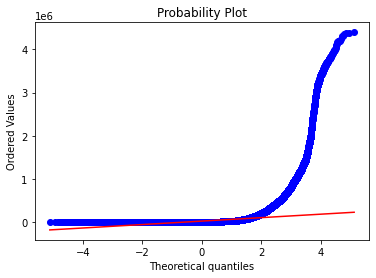

In [37]:
stats.probplot(sales_data.sales_dollars_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 15.29147925,
         15.29178524, 15.29619741])),
 (2.410722643797487, 7.757693412116134, 0.994128849029883))

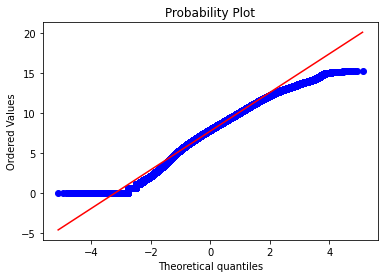

In [38]:
stats.probplot(np.log(sales_data.sales_dollars_value), dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([     1,      1,      1, ..., 856316, 865676, 873998], dtype=int64)),
 (10949.739575763819, 5233.099949473047, 0.4050075053171032))

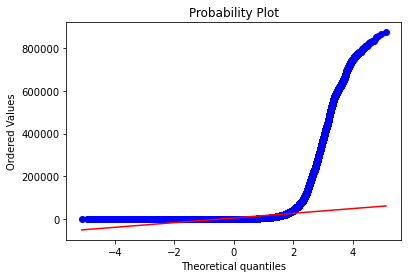

In [39]:
stats.probplot(sales_data.sales_units_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 13.66039475,
         13.67126598, 13.68083337])),
 (2.3707475507106155, 5.972450880845805, 0.9982559533431954))

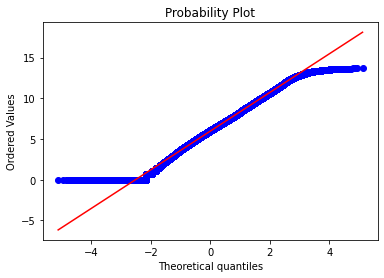

In [40]:
stats.probplot(np.log(sales_data.sales_units_value), dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([       1,        1,        1, ..., 10501250, 10516150, 11003100],
        dtype=int64)),
 (40025.65716812249, 17396.24660265091, 0.31215780022330003))

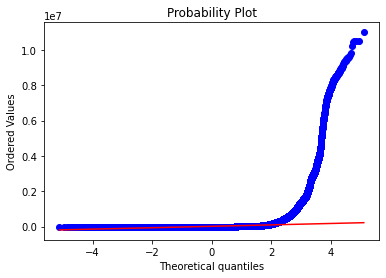

In [41]:
stats.probplot(sales_data.sales_lbs_value, dist='norm', plot=pylab)

((array([-5.11688565, -4.9469165 , -4.85528857, ...,  4.85528857,
          4.9469165 ,  5.11688565]),
  array([ 0.        ,  0.        ,  0.        , ..., 16.16700486,
         16.16842273, 16.21368761])),
 (2.754523842977448, 6.402305948307131, 0.9983855753124597))

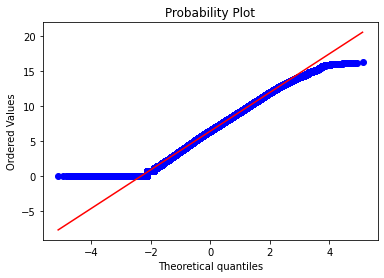

In [42]:
stats.probplot(np.log(sales_data.sales_lbs_value), dist='norm', plot=pylab)

In [43]:
sales_data.sales_dollars_value= np.log(sales_data.sales_dollars_value)

In [44]:
sales_data.sales_lbs_value= np.log(sales_data.sales_lbs_value)

In [45]:
sales_data.sales_units_value= np.log(sales_data.sales_units_value)

(array([ 148975.,  270002.,  504753.,  867710., 1077902.,  845785.,
         467598.,  205569.,   58619.,   16052.]),
 array([ 0.        ,  1.36808334,  2.73616667,  4.10425001,  5.47233335,
         6.84041668,  8.20850002,  9.57658336, 10.94466669, 12.31275003,
        13.68083337]),
 <BarContainer object of 10 artists>)

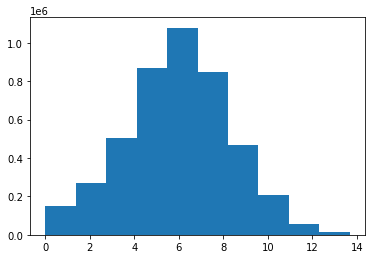

In [46]:
plt.hist(sales_data.sales_units_value)

(array([  52910.,  149535.,  262442.,  531274., 1014204., 1188777.,
         808580.,  359092.,   91873.,    4278.]),
 array([ 0.        ,  1.52961974,  3.05923948,  4.58885922,  6.11847896,
         7.6480987 ,  9.17771844, 10.70733818, 12.23695792, 13.76657766,
        15.29619741]),
 <BarContainer object of 10 artists>)

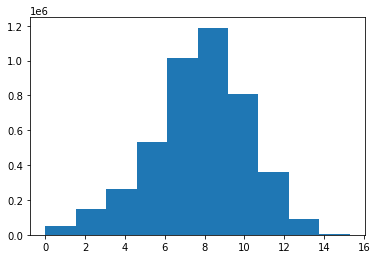

In [47]:
plt.hist(sales_data.sales_dollars_value)

(array([ 233317.,  361544.,  675531.,  975506., 1015729.,  690891.,
         351574.,  126202.,   30274.,    2397.]),
 array([ 0.        ,  1.62136876,  3.24273752,  4.86410628,  6.48547504,
         8.1068438 ,  9.72821257, 11.34958133, 12.97095009, 14.59231885,
        16.21368761]),
 <BarContainer object of 10 artists>)

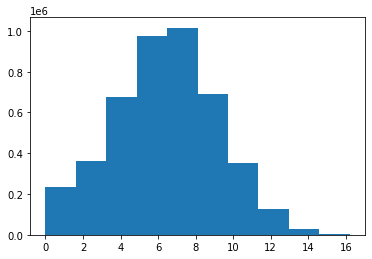

In [48]:
plt.hist(sales_data.sales_lbs_value)

#### social media data

In [49]:
social_media_data.head()

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,76
1,148.0,2015-10-10 00:00:00,31
2,148.0,2015-11-10 00:00:00,65
3,148.0,2015-12-10 00:00:00,88
4,148.0,10/13/2015,85


In [50]:
social_media_data.describe()

,Theme Id,total_post
count,314879.000000,533390.000000
mean,618.714049,1054.344890
std,290.145829,4459.377626
min,8.000000,0.000000
25%,440.000000,3.000000
50%,677.000000,35.000000
75%,870.000000,343.000000
max,999.000000,369528.000000


second moment business decision

In [51]:
range1 = max(social_media_data.total_post)-min(social_media_data.total_post)
social_media_data.total_post.var(),social_media_data.total_post.std(), range1,min(social_media_data.total_post),max(social_media_data.total_post)

(19886048.807687316, 4459.377625598366, 369528, 0, 369528)

In [52]:
no_posts =social_media_data[(social_media_data['total_post']==0)]

In [53]:
no_posts['Theme Id'].nunique()

153

Third and fourth moment business decision

In [54]:
social_media_data['total_post'].skew(), social_media_data['total_post'].kurt()

(13.625224300263731, 361.68506791653)

plots

(array([5.32046e+05, 1.04200e+03, 2.55000e+02, 2.80000e+01, 1.20000e+01,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  36952.8,  73905.6, 110858.4, 147811.2, 184764. ,
        221716.8, 258669.6, 295622.4, 332575.2, 369528. ]),
 <BarContainer object of 10 artists>)

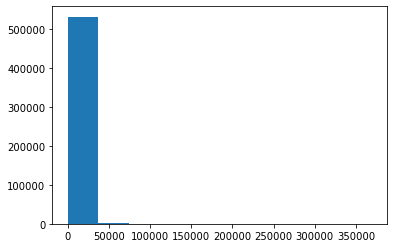

In [55]:
plt.hist(social_media_data['total_post'])

In [56]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [57]:
social_media_data['total_post'] = norm_func(social_media_data['total_post'])

In [58]:
social_media_data

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,0.000206
1,148.0,2015-10-10 00:00:00,0.000084
2,148.0,2015-11-10 00:00:00,0.000176
3,148.0,2015-12-10 00:00:00,0.000238
4,148.0,10/13/2015,0.000230
...,...,...,...
533385,876.0,2019-05-09 00:00:00,0.012605
533386,876.0,2019-06-09 00:00:00,0.010097
533387,876.0,2019-07-09 00:00:00,0.006322
533388,876.0,2019-08-09 00:00:00,0.003718


#### Theme list

In [59]:
Theme_list.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [60]:
Theme_list['CLAIM_ID'].nunique()

208

#### Theme product list

In [61]:
Theme_product_list.head()

,PRODUCT_ID,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227


In [62]:
Theme_product_list['CLAIM_ID'].nunique()

51

### 3. Data-Preprocessing

#### 3.1 Merging the Datasets

Step-1: Merge Theme_product_list and Theme_list,LEFT JOIN on CLAIM_ID

We are joining theme product list with theme list because we want each product id
corresponding to each claim id/theme id and not vice-versa.
So, we cannot lose information from theme product list

In [63]:
Theme_product_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91485 entries, 0 to 91484
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PRODUCT_ID  91485 non-null  int64
 1   CLAIM_ID    91485 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [64]:
Theme_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CLAIM_ID    208 non-null    int64 
 1   Claim Name  208 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [65]:
theme_prod_list = pd.merge(Theme_product_list,Theme_list,on = 'CLAIM_ID',how='left')

In [66]:
theme_prod_list

,PRODUCT_ID,CLAIM_ID,Claim Name
0,26,8,low carb
1,29,8,low carb
2,48,81,gmo free
3,50,81,gmo free
4,74,227,salmon
...,...,...,...
91480,8158,0,No Claim
91481,45183,0,No Claim
91482,25690,0,No Claim
91483,46085,0,No Claim


In [67]:
theme_prod_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91485 entries, 0 to 91484
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  91485 non-null  int64 
 1   CLAIM_ID    91485 non-null  int64 
 2   Claim Name  91485 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


Step-2: Merge theme_prod_list with product_manufacturer_list, LEFT JOIN ON PRODUCT_ID

We are joining theme product list with product_manufacturer list because we want each product id
corresponding to each vendor for a particular claim id/theme id and not vice-versa.
So, we cannot lose information from product manufacturer list

In [68]:
product_manufacturer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRODUCT_ID  67175 non-null  int64  
 1   Vendor      67175 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ MB


In [69]:
product_manufacturer_list.head()

,PRODUCT_ID,Vendor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN


In [70]:
product_manufacturer_list = product_manufacturer_list.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

In [71]:
product_manufacturer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67175 entries, 0 to 67174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  67175 non-null  int64 
 1   Vendor      67175 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [72]:
product_manufacturer_list.head()

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [73]:
product_manufacturer_list['PRODUCT_ID'].nunique()

67175

In [74]:
theme_prod_list['PRODUCT_ID'].nunique()

57317

In [75]:
product_manufacturer_theme_list = pd.merge(product_manufacturer_list,theme_prod_list,on = 'PRODUCT_ID',how='left')

In [76]:
product_manufacturer_theme_list.head()

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name
0,1,Others,0.0,No Claim
1,2,Others,0.0,No Claim
2,3,Others,0.0,No Claim
3,4,Others,0.0,No Claim
4,5,Others,0.0,No Claim


In [77]:
product_manufacturer_theme_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101343 entries, 0 to 101342
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PRODUCT_ID  101343 non-null  int64  
 1   Vendor      101343 non-null  object 
 2   CLAIM_ID    91485 non-null   float64
 3   Claim Name  91485 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [78]:
product_manufacturer_theme_list

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name
0,1,Others,0.0,No Claim
1,2,Others,0.0,No Claim
2,3,Others,0.0,No Claim
3,4,Others,0.0,No Claim
4,5,Others,0.0,No Claim
...,...,...,...,...
101338,67171,Private Label,NaN,NaN
101339,67172,Private Label,NaN,NaN
101340,67173,Private Label,NaN,NaN
101341,67174,Private Label,NaN,NaN


In [79]:
product_manufacturer_theme_list['PRODUCT_ID'].nunique()

67175

In [80]:
product_manufacturer_theme_list[product_manufacturer_theme_list['PRODUCT_ID']==543]

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name
1060,543,Others,39.0,high/source of protein
1061,543,Others,158.0,chicken
1062,543,Others,438.0,ethnic & exotic
1063,543,Others,16.0,cocoa
1064,543,Others,8.0,low carb
1065,543,Others,75.0,french bisque
1066,543,Others,432.0,apple cinnamon


In [81]:
product_manufacturer_theme_list['CLAIM_ID'].nunique()

51

One product id can have more than one claim/theme, will work on this in feature-engineering part

Step-3: Simplify sales data to achieve good business interpretation

In [82]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462965 entries, 0 to 4526181
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   system_calendar_key_N  int64  
 1   product_id             int64  
 2   sales_dollars_value    float64
 3   sales_units_value      float64
 4   sales_lbs_value        float64
dtypes: float64(3), int64(2)
memory usage: 204.3 MB


In [83]:
sales_data['product_id'].nunique()

41922

In [84]:
sales_data.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,9.541585,6.839476,9.835209
1,20160109,3,9.238831,7.372746,10.262769
2,20160109,4,5.877736,3.091042,6.086775
3,20160109,6,10.048151,7.614312,11.303290
4,20160109,7,10.050916,8.080547,10.971022


In [85]:
sales_data.rename(columns={'product_id':'PRODUCT_ID'},inplace=True)

In [86]:
sales_data.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,9.541585,6.839476,9.835209
1,20160109,3,9.238831,7.372746,10.262769
2,20160109,4,5.877736,3.091042,6.086775
3,20160109,6,10.048151,7.614312,11.303290
4,20160109,7,10.050916,8.080547,10.971022


Sales data is based on day basis but for easy business interpretation,
let's group by this dataset by product id then on year basis

In [87]:
sales_data['system_calendar_key_N']

0          20160109
1          20160109
2          20160109
3          20160109
4          20160109
             ...   
4526177    20181027
4526178    20181027
4526179    20181027
4526180    20181027
4526181    20181027
Name: system_calendar_key_N, Length: 4462965, dtype: int64

In [88]:
sales_data['system_calendar_key_N'] = pd.to_datetime(sales_data['system_calendar_key_N'], format='%Y%m%d')

In [89]:
sales_data.head(30)

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,9.541585,6.839476,9.835209
1,2016-01-09,3,9.238831,7.372746,10.262769
2,2016-01-09,4,5.877736,3.091042,6.086775
3,2016-01-09,6,10.048151,7.614312,11.303290
4,2016-01-09,7,10.050916,8.080547,10.971022
5,2016-01-09,8,10.773294,8.272315,11.268150
6,2016-01-09,9,12.627247,9.884254,13.573145
7,2016-01-09,11,8.259199,5.817111,8.813587
8,2016-01-09,12,10.494159,7.656337,11.345217
9,2016-01-09,14,9.940687,7.049255,9.128696


In [90]:
sales_data['system_calendar_key_N']

0         2016-01-09
1         2016-01-09
2         2016-01-09
3         2016-01-09
4         2016-01-09
             ...    
4526177   2018-10-27
4526178   2018-10-27
4526179   2018-10-27
4526180   2018-10-27
4526181   2018-10-27
Name: system_calendar_key_N, Length: 4462965, dtype: datetime64[ns]

In [91]:
sales_data['year'], sales_data['month'], sales_data['week'] = sales_data['system_calendar_key_N'].dt.year, sales_data['system_calendar_key_N'].dt.month,sales_data['system_calendar_key_N'].dt.isocalendar().week

In [92]:
sales_data.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,year,month,week
0,2016-01-09,1,9.541585,6.839476,9.835209,2016,1,1
1,2016-01-09,3,9.238831,7.372746,10.262769,2016,1,1
2,2016-01-09,4,5.877736,3.091042,6.086775,2016,1,1
3,2016-01-09,6,10.048151,7.614312,11.303290,2016,1,1
4,2016-01-09,7,10.050916,8.080547,10.971022,2016,1,1


In [93]:
sales_data.drop(['system_calendar_key_N'],axis=1,inplace = True)

In [94]:
sales_data

,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,year,month,week
0,1,9.541585,6.839476,9.835209,2016,1,1
1,3,9.238831,7.372746,10.262769,2016,1,1
2,4,5.877736,3.091042,6.086775,2016,1,1
3,6,10.048151,7.614312,11.303290,2016,1,1
4,7,10.050916,8.080547,10.971022,2016,1,1
...,...,...,...,...,...,...,...
4526177,47536,2.079442,0.693147,1.098612,2018,10,43
4526178,47539,5.968708,3.663562,4.219508,2018,10,43
4526179,47543,4.653960,4.077537,3.871201,2018,10,43
4526180,47544,8.221479,7.127694,8.380457,2018,10,43


In [95]:
sales_data['year'].value_counts()

2018    1230534
2017    1189570
2016    1118032
2019     924829
Name: year, dtype: int64

In [96]:
sales_data['month'].value_counts()

9     414896
6     411065
7     409092
3     408822
4     405075
8     390196
5     361182
2     360908
1     359272
12    345872
10    320078
11    276507
Name: month, dtype: int64

In [97]:
sales_data['week'].value_counts()

35    92238
36    92173
34    92043
33    91912
37    91867
38    91840
39    91837
40    91724
26    91513
32    91463
25    91433
31    91412
27    91234
30    91165
28    91146
29    91132
24    91016
23    90931
9     90627
22    90587
10    90565
21    90513
12    90497
11    90465
13    90453
14    90452
8     90368
15    90354
7     90304
20    90265
18    90251
17    90247
16    90237
6     90160
19    90153
5     90076
2     89891
3     89818
1     89787
4     89776
51    69625
50    69274
46    69269
45    69237
49    69186
44    69044
47    68957
48    68925
41    68897
43    68892
42    68872
52    68862
Name: week, dtype: Int64

Average Sales data grouped by Product_ID per year per month per week basis

In [98]:
sales_data.groupby(['PRODUCT_ID','year','month','week']).mean()

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
...                                         ...                ...   
57317      2019 9     36               6.588926           5.583496   
                      37               7.206377           6.190315   
                      38               6.943122           5.902633   
                      39               7.273786           6.240276   
                10    40               6.762730           5.755742   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
...                                     ...  
57317      2019 9     36           4.605170  
                      37           5.209486  
                      38           4.919981  
                      39           5.262690  
                10    40           4.770685  

[4462965 rows x 3 columns]

Average Sales value for product_id = 1 for year 2016

In [99]:
sales_data.groupby(['PRODUCT_ID','year','month','week']).mean().head(50)

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
                      6                9.301916           6.664409   
                      7                9.360827           6.716595   
                      8                9.382948           6.748760   
                3     9                9.460087           6.840547   
                      10               9.388235           6.758095   
                      11               9.361085           6.732211   
                      12               9.300912           6.708084   
                4     13               9.281637           6.639876   
                      14               9.322776           6.672033   
                      15               9.338997           6.677083   
                      16               9.471473           6.804615   
                      17               9.385134           6.751101   
                5     18               9.472628           6.840547   
                      19               9.364434           6.866933   
                      20               9.268326           6.765039   
                      21               9.401209           6.891626   
                6     22               9.535101           7.025538   
                      23               9.408781           6.909753   
                      24               9.309733           6.820016   
                      25               9.437635           6.861711   
                7     26               9.381432           6.935370   
                      27               9.359967           6.857514   
                      28               9.428029           6.909753   
                      29               9.323223           6.797940   
                      30               9.365719           6.809039   
                8     31               9.329722           6.827629   
                      32               9.311181           6.693324   
                      33               9.380505           6.786717   
                      34               9.460632           6.848005   
                9     35               9.370331           6.733402   
                      36               9.233178           6.618739   
                      37               9.325899           6.705639   
                      38               9.359277           6.783325   
                10    39               9.321524           6.829794   
                      40               9.371013           6.897705   
                      41               9.451245           6.923629   
                      42               9.348971           6.792344   
                      43               9.321524           6.784457   
                11    44               9.393079           6.875232   
                      45               9.398892           6.797940   
                      46               9.451324           6.839476   
                      47               9.384798           6.776507   
                12    48               9.448963           6.848005   
                      49               9.357812           6.769642   
                      50               9.435881           6.840547   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
                      6            9.660269  
                   

It seems for product id=1, for months=5,6,7,10,11,12 average sales are quite high i.e during Christmas, Diwali and New-Year, also generally for 1st and last two weeks, sales are much higher

In [100]:
yearly_sales_data = sales_data.groupby(['PRODUCT_ID','year','month','week']).mean()

In [101]:
yearly_sales_data

sales_dollars_value  sales_units_value  \
PRODUCT_ID year month week                                           
1          2016 1     1                9.541585           6.839476   
                      2                9.302920           6.645091   
                      3                9.443672           6.777647   
                      4                9.355998           6.710523   
                2     5                9.339525           6.697034   
...                                         ...                ...   
57317      2019 9     36               6.588926           5.583496   
                      37               7.206377           6.190315   
                      38               6.943122           5.902633   
                      39               7.273786           6.240276   
                10    40               6.762730           5.755742   

                            sales_lbs_value  
PRODUCT_ID year month week                   
1          2016 1     1            9.835209  
                      2            9.640823  
                      3            9.773607  
                      4            9.706499  
                2     5            9.692767  
...                                     ...  
57317      2019 9     36           4.605170  
                      37           5.209486  
                      38           4.919981  
                      39           5.262690  
                10    40           4.770685  

[4462965 rows x 3 columns]

In [102]:
yearly_sales_data = yearly_sales_data.reset_index()

As seen, now we have sales_data reduced to weekly average sales data for a particular product id over 12 months

In [103]:
yearly_sales_data.head()

,PRODUCT_ID,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,2016,1,1,9.541585,6.839476,9.835209
1,1,2016,1,2,9.302920,6.645091,9.640823
2,1,2016,1,3,9.443672,6.777647,9.773607
3,1,2016,1,4,9.355998,6.710523,9.706499
4,1,2016,2,5,9.339525,6.697034,9.692767


Each vendor can only send one product, that's why we will merge product_manufacturer list to sales_data. Also, for a particular product, sales price will be one to one mapped only

In [104]:
def comp_func(df1,df2):
    
    count=0
    for i in df1:
        if i in df2:
            count+=1
    return count

In [105]:
df1=product_manufacturer_theme_list[product_manufacturer_theme_list['Vendor']=='A']['PRODUCT_ID'].unique()

In [106]:
df2=product_manufacturer_theme_list[product_manufacturer_theme_list['Vendor']=='B']['PRODUCT_ID'].unique()

In [107]:
comp_func(df1,df2)

0

Step-4: Merge product_manufacturer_theme_list with yearly_sales_data, LEFT JOIN on PRODUCT_ID 

In [108]:
#Average Sales data showing product 1 sold out on these months of the year
yearly_sales_data[yearly_sales_data['PRODUCT_ID']==1]

,PRODUCT_ID,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,2016,1,1,9.541585,6.839476,9.835209
1,1,2016,1,2,9.302920,6.645091,9.640823
2,1,2016,1,3,9.443672,6.777647,9.773607
3,1,2016,1,4,9.355998,6.710523,9.706499
4,1,2016,2,5,9.339525,6.697034,9.692767
...,...,...,...,...,...,...,...
191,1,2019,9,36,8.289539,5.638355,8.633375
192,1,2019,9,37,8.221479,5.609472,8.605204
193,1,2019,9,38,8.033009,5.416100,8.411833
194,1,2019,9,39,8.123854,5.501258,8.496990


In [109]:
yearly_sales_data[yearly_sales_data['PRODUCT_ID']==543]

,PRODUCT_ID,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
15386,543,2017,1,1,6.594413,5.837730,5.605802
15387,543,2017,1,2,6.284134,5.594711,5.365976
15388,543,2017,1,3,5.828946,5.141664,4.912655
15389,543,2017,1,4,6.082219,5.393628,5.164786
15390,543,2017,2,5,4.804021,4.290459,4.060443
...,...,...,...,...,...,...,...
15513,543,2019,9,36,6.677083,5.945421,5.713733
15514,543,2019,9,37,6.862758,6.118097,5.886104
15515,543,2019,9,38,6.742881,5.991465,5.758902
15516,543,2019,9,39,6.742881,5.991465,5.758902


In [110]:
yearly_sales_data['PRODUCT_ID'].nunique()

41922

In [111]:
product_manufacturer_list['PRODUCT_ID'].nunique()

67175

We are merging product manufacturer list to yearly sales data for only those product id's
for which we have vendor information and theme/claim information, that's why LEFT JOIN

In [112]:
product_manufacturer_sales = pd.merge(product_manufacturer_theme_list,yearly_sales_data,how='left',on = 'PRODUCT_ID')

In [113]:
#Product sales from a particular vendor on respective months of the year

product_manufacturer_sales.head()

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767


In [114]:
product_manufacturer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716704 entries, 0 to 7716703
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   CLAIM_ID             float64
 3   Claim Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
dtypes: UInt32(1), float64(6), int64(1), object(2)
memory usage: 625.5+ MB


In [115]:
product_manufacturer_sales[product_manufacturer_sales['PRODUCT_ID']==1]

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767
...,...,...,...,...,...,...,...,...,...,...
191,1,Others,0.0,No Claim,2019.0,9.0,36,8.289539,5.638355,8.633375
192,1,Others,0.0,No Claim,2019.0,9.0,37,8.221479,5.609472,8.605204
193,1,Others,0.0,No Claim,2019.0,9.0,38,8.033009,5.416100,8.411833
194,1,Others,0.0,No Claim,2019.0,9.0,39,8.123854,5.501258,8.496990


In [116]:
product_manufacturer_sales[product_manufacturer_sales['PRODUCT_ID']==543]

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
24959,543,Others,39.0,high/source of protein,2017.0,1.0,1,6.594413,5.837730,5.605802
24960,543,Others,39.0,high/source of protein,2017.0,1.0,2,6.284134,5.594711,5.365976
24961,543,Others,39.0,high/source of protein,2017.0,1.0,3,5.828946,5.141664,4.912655
24962,543,Others,39.0,high/source of protein,2017.0,1.0,4,6.082219,5.393628,5.164786
24963,543,Others,39.0,high/source of protein,2017.0,2.0,5,4.804021,4.290459,4.060443
...,...,...,...,...,...,...,...,...,...,...
25878,543,Others,432.0,apple cinnamon,2019.0,9.0,36,6.677083,5.945421,5.713733
25879,543,Others,432.0,apple cinnamon,2019.0,9.0,37,6.862758,6.118097,5.886104
25880,543,Others,432.0,apple cinnamon,2019.0,9.0,38,6.742881,5.991465,5.758902
25881,543,Others,432.0,apple cinnamon,2019.0,9.0,39,6.742881,5.991465,5.758902


It is quite clear that there is no data loss, as previously we were getting 7 rows for product id 543, now we are getting sales for around 132 weeks so 7*132 = 924. Now, we have for each product-id, it's theme, it's average sales over each week in a month in a year.

Step 5: It seems that Theme ID and Claim ID are indeed same.

In [117]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,5.855072,916,1,2014
1,06-01-2014,google,5.855072,916,2,2014
2,07-01-2014,google,6.546785,916,2,2014
3,10-01-2014,google,5.855072,916,2,2014
4,20-01-2014,google,6.546785,916,4,2014


In [118]:
social_media_data.head()

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,0.000206
1,148.0,2015-10-10 00:00:00,0.000084
2,148.0,2015-11-10 00:00:00,0.000176
3,148.0,2015-12-10 00:00:00,0.000238
4,148.0,10/13/2015,0.000230


In [119]:
google_search_data['Claim_ID'].value_counts()

967    5744
576    4009
670    4003
8      3966
634    3787
       ... 
125       2
681       2
433       2
514       1
606       1
Name: Claim_ID, Length: 160, dtype: int64

In [120]:
social_media_data['Theme Id'].value_counts()

788.0    3223
967.0    3223
556.0    1625
26.0     1625
960.0    1625
         ... 
543.0    1597
922.0    1511
634.0    1511
576.0    1511
670.0    1511
Name: Theme Id, Length: 193, dtype: int64

In [121]:
pd.Series(social_media_data['Theme Id'].unique()).sort_values()

91       8.0
129     15.0
121     26.0
142     38.0
146     39.0
       ...  
155    983.0
10     984.0
83     985.0
3      999.0
192      NaN
Length: 194, dtype: float64

In [122]:
pd.Series(google_search_data['Claim_ID'].unique()).sort_values()

1        8
4       39
5       40
70      65
96      75
      ... 
153    981
137    982
114    984
152    985
8      999
Length: 160, dtype: int64

It is quite evident that claim id and theme id are same

Different Themes across the data source


In [123]:
product_manufacturer_sales['Claim Name'].unique()

array(['No Claim', 'low carb', 'salmon', 'chicken', 'gmo free',
       'no additives/preservatives', 'ethnic & exotic', 'soy foods',
       'buckwheat', 'apple cinnamon', 'gingerbread',
       'american southwest style', 'pollock', 'stroganoff', 'blueberry',
       'cookie', 'pizza', 'poultry', 'herbs', 'crab', 'nuts',
       'vegetarian', 'scallop', 'low sugar', 'low sodium',
       'beef hamburger', 'ethical - not specific',
       'high/source of protein', 'cocoa', 'tilapia', 'french bisque',
       'brown ale', 'mackerel', 'convenience - easy-to-prepare',
       'sea salt', 'beans', 'prebiotic', 'american gumbo', 'tuna',
       'ethical - packaging', 'energy/alertness', 'cumin', 'peach',
       'tutti frutti', 'red raspberry', 'french', 'bone health',
       'low calorie', 'halal', 'peanut', 'cherry', nan], dtype=object)

Step6: Simplify Social_media_data and google_search_data for easy business interpretation as well
as to get some accurate predictions from modeling point of view.

In [124]:
social_media_data

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,0.000206
1,148.0,2015-10-10 00:00:00,0.000084
2,148.0,2015-11-10 00:00:00,0.000176
3,148.0,2015-12-10 00:00:00,0.000238
4,148.0,10/13/2015,0.000230
...,...,...,...
533385,876.0,2019-05-09 00:00:00,0.012605
533386,876.0,2019-06-09 00:00:00,0.010097
533387,876.0,2019-07-09 00:00:00,0.006322
533388,876.0,2019-08-09 00:00:00,0.003718


In [125]:
social_media_data['published_date']

0         2015-01-10 00:00:00
1         2015-10-10 00:00:00
2         2015-11-10 00:00:00
3         2015-12-10 00:00:00
4                  10/13/2015
                 ...         
533385    2019-05-09 00:00:00
533386    2019-06-09 00:00:00
533387    2019-07-09 00:00:00
533388    2019-08-09 00:00:00
533389    2019-09-09 00:00:00
Name: published_date, Length: 533390, dtype: object

In [126]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  float64
dtypes: float64(2), object(1)
memory usage: 12.2+ MB


In [127]:
100*social_media_data['Theme Id'].isnull().sum()/len(social_media_data['Theme Id'])

40.9664598136448

In [128]:
social_media_data[social_media_data['Theme Id'].isnull()]

,Theme Id,published_date,total_post
313254,NaN,2015-01-10 00:00:00,0.000035
313255,NaN,2015-10-10 00:00:00,0.000024
313256,NaN,2015-11-10 00:00:00,0.000043
313257,NaN,2015-12-10 00:00:00,0.000035
313258,NaN,10/13/2015,0.000027
...,...,...,...
531760,NaN,2019-05-09 00:00:00,0.001183
531761,NaN,2019-06-09 00:00:00,0.000909
531762,NaN,2019-07-09 00:00:00,0.001020
531763,NaN,2019-08-09 00:00:00,0.002141


Around 41% of the data is missing in social_media_data, let's fill this with 0 since these NaN value 
belongs to No claims which we have under Claim names category

In [129]:
social_media_data.fillna(0.0,inplace=True)

In [130]:
social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        533390 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  float64
dtypes: float64(2), object(1)
memory usage: 12.2+ MB


In [131]:
social_media_data[social_media_data['Theme Id']==0]

,Theme Id,published_date,total_post
313254,0.0,2015-01-10 00:00:00,0.000035
313255,0.0,2015-10-10 00:00:00,0.000024
313256,0.0,2015-11-10 00:00:00,0.000043
313257,0.0,2015-12-10 00:00:00,0.000035
313258,0.0,10/13/2015,0.000027
...,...,...,...
531760,0.0,2019-05-09 00:00:00,0.001183
531761,0.0,2019-06-09 00:00:00,0.000909
531762,0.0,2019-07-09 00:00:00,0.001020
531763,0.0,2019-08-09 00:00:00,0.002141


Now will make this complex dataset into simple dataset

In [132]:
social_media_data['published_date'] = pd.to_datetime(social_media_data['published_date'])


In [133]:
social_media_data.head()

,Theme Id,published_date,total_post
0,148.0,2015-01-10,0.000206
1,148.0,2015-10-10,0.000084
2,148.0,2015-11-10,0.000176
3,148.0,2015-12-10,0.000238
4,148.0,2015-10-13,0.000230


In [134]:
social_media_data['year'], social_media_data['month'],social_media_data['week'] = social_media_data['published_date'].dt.year, social_media_data['published_date'].dt.month, social_media_data['published_date'].dt.isocalendar().week

In [135]:
social_media_data.head()

,Theme Id,published_date,total_post,year,month,week
0,148.0,2015-01-10,0.000206,2015,1,2
1,148.0,2015-10-10,0.000084,2015,10,41
2,148.0,2015-11-10,0.000176,2015,11,46
3,148.0,2015-12-10,0.000238,2015,12,50
4,148.0,2015-10-13,0.000230,2015,10,42


In [136]:
social_media_data.drop(['published_date'],axis=1,inplace=True)

In [137]:
social_media_data

,Theme Id,total_post,year,month,week
0,148.0,0.000206,2015,1,2
1,148.0,0.000084,2015,10,41
2,148.0,0.000176,2015,11,46
3,148.0,0.000238,2015,12,50
4,148.0,0.000230,2015,10,42
...,...,...,...,...,...
533385,876.0,0.012605,2019,5,19
533386,876.0,0.010097,2019,6,23
533387,876.0,0.006322,2019,7,28
533388,876.0,0.003718,2019,8,32


In [138]:
social_media_data.rename(columns={'Theme Id':'Theme_ID'},inplace=True)

In [139]:
social_media_data.head()

,Theme_ID,total_post,year,month,week
0,148.0,0.000206,2015,1,2
1,148.0,0.000084,2015,10,41
2,148.0,0.000176,2015,11,46
3,148.0,0.000238,2015,12,50
4,148.0,0.000230,2015,10,42


In [140]:
social_media_data.groupby(['Theme_ID','year','month','week']).mean()

total_post
Theme_ID year month week            
0.0      2015 1     2       0.004486
                    3       0.004662
              2     6       0.004182
                    7       0.004968
              3     10      0.004217
...                              ...
999.0    2019 11    44      0.000115
                    45      0.000204
              12    48      0.000030
                    49      0.000651
                    50      0.000070

[55761 rows x 1 columns]

In [141]:
social_media_data.groupby(['Theme_ID','year','month','week']).mean().head(50)

total_post
Theme_ID year month week            
0.0      2015 1     2       0.004486
                    3       0.004662
              2     6       0.004182
                    7       0.004968
              3     10      0.004217
                    11      0.004561
              4     15      0.004369
              5     19      0.004291
                    20      0.004477
                    21      0.002897
                    22      0.004276
              6     23      0.003780
                    24      0.004638
                    25      0.004023
                    26      0.004157
                    27      0.004437
              7     28      0.004483
                    29      0.004250
                    30      0.004354
                    31      0.004434
              8     32      0.004584
                    33      0.004207
                    34      0.004349
                    35      0.004222
                    36      0.004514
              9     36      0.004828
                    37      0.004531
                    38      0.004302
                    39      0.004142
                    40      0.004817
              10    41      0.004576
                    42      0.004672
                    43      0.004812
                    44      0.004901
              11    45      0.004273
                    46      0.004462
                    47      0.004702
                    48      0.004503
                    49      0.005308
              12    49      0.004183
                    50      0.004131
                    51      0.004360
                    52      0.003628
                    53      0.004188
         2016 1     1       0.005707
                    2       0.005510
                    3       0.005134
                    4       0.005065
                    53      0.004687
              2     5       0.004918

For theme id 0, these are the average number of posts in year 2015 for 12 months  for following weeks

In [142]:
social_media_data_year = social_media_data.groupby(['Theme_ID','year','month','week']).mean()

In [143]:
social_media_data_year = social_media_data_year.reset_index()

In [144]:
social_media_data_year

,Theme_ID,year,month,week,total_post
0,0.0,2015,1,2,0.004486
1,0.0,2015,1,3,0.004662
2,0.0,2015,2,6,0.004182
3,0.0,2015,2,7,0.004968
4,0.0,2015,3,10,0.004217
...,...,...,...,...,...
55756,999.0,2019,11,44,0.000115
55757,999.0,2019,11,45,0.000204
55758,999.0,2019,12,48,0.000030
55759,999.0,2019,12,49,0.000651


In [145]:
social_media_data_year

,Theme_ID,year,month,week,total_post
0,0.0,2015,1,2,0.004486
1,0.0,2015,1,3,0.004662
2,0.0,2015,2,6,0.004182
3,0.0,2015,2,7,0.004968
4,0.0,2015,3,10,0.004217
...,...,...,...,...,...
55756,999.0,2019,11,44,0.000115
55757,999.0,2019,11,45,0.000204
55758,999.0,2019,12,48,0.000030
55759,999.0,2019,12,49,0.000651


In [146]:
social_media_data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55761 entries, 0 to 55760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Theme_ID    55761 non-null  float64
 1   year        55761 non-null  int64  
 2   month       55761 non-null  int64  
 3   week        55761 non-null  UInt32 
 4   total_post  55761 non-null  float64
dtypes: UInt32(1), float64(2), int64(2)
memory usage: 2.0 MB


In [147]:
social_media_data_year.head(50)

,Theme_ID,year,month,week,total_post
0,0.0,2015,1,2,0.004486
1,0.0,2015,1,3,0.004662
2,0.0,2015,2,6,0.004182
3,0.0,2015,2,7,0.004968
4,0.0,2015,3,10,0.004217
5,0.0,2015,3,11,0.004561
6,0.0,2015,4,15,0.004369
7,0.0,2015,5,19,0.004291
8,0.0,2015,5,20,0.004477
9,0.0,2015,5,21,0.002897


As we can see for theme_id = 0, maximum posts have been done in 2nd, 10th, and 11th month due to festival seasons that in tend to give higher sales in month of Nov, Dec, Jan and Feb, also number of posts are maximum in 3rd and 4th week

Also, we have reduced the number of rows from 533390 to 55761

Now this dataset is showing average number of posts for each Theme id in a year over 12 months per week rather than each day of a year. We will do business interpretation of social media posts on week, month and year basis rather than on day basis. 

In the similar way, let's simplify google_search_data

In [148]:
google_search_data

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,5.855072,916,1,2014
1,06-01-2014,google,5.855072,916,2,2014
2,07-01-2014,google,6.546785,916,2,2014
3,10-01-2014,google,5.855072,916,2,2014
4,20-01-2014,google,6.546785,916,4,2014
...,...,...,...,...,...,...
181560,05-09-2019,walmart,4.828314,980,36,2019
181561,22-09-2019,walmart,4.430817,980,38,2019
181562,26-09-2019,walmart,3.737670,980,39,2019
181563,15-07-2019,walmart,3.737670,622,29,2019


In [149]:
google_search_data['year_new'].value_counts()

2018    51388
2019    38682
2017    27399
2016    22280
2015    21372
2014    20444
Name: year_new, dtype: int64

In [150]:
product_manufacturer_sales['year'].value_counts()

2018.0    2165505
2017.0    2030098
2016.0    1842840
2019.0    1646458
Name: year, dtype: int64

In [151]:
social_media_data_year['year'].value_counts()

2018    12222
2017    12111
2016    12028
2019    10864
2015     8536
Name: year, dtype: int64

In [152]:
product_manufacturer_sales.head()

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767


In [153]:
social_media_data.head()

,Theme_ID,total_post,year,month,week
0,148.0,0.000206,2015,1,2
1,148.0,0.000084,2015,10,41
2,148.0,0.000176,2015,11,46
3,148.0,0.000238,2015,12,50
4,148.0,0.000230,2015,10,42


In [154]:
google_search_data.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,5.855072,916,1,2014
1,06-01-2014,google,5.855072,916,2,2014
2,07-01-2014,google,6.546785,916,2,2014
3,10-01-2014,google,5.855072,916,2,2014
4,20-01-2014,google,6.546785,916,4,2014


In [155]:
google_search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          181565 non-null  object 
 1   platform      181565 non-null  object 
 2   searchVolume  181565 non-null  float64
 3   Claim_ID      181565 non-null  int64  
 4   week_number   181565 non-null  int64  
 5   year_new      181565 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.3+ MB


In [156]:
google_search_data['date'] = pd.to_datetime(google_search_data['date'])

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '20-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '30-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '31-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or speci

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '14-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '25-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '27-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  google_search_data['date'] = pd.to_datetime(google_search_data['date'])
C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4168\492234367.py:1: UserWarning: Parsing '28-10-2016' in DD/MM/YYYY format. Provide format or speci

In [157]:
google_search_data['month'] = google_search_data['date'].dt.month

In [158]:
google_search_data

,date,platform,searchVolume,Claim_ID,week_number,year_new,month
0,2014-05-01,google,5.855072,916,1,2014,5
1,2014-06-01,google,5.855072,916,2,2014,6
2,2014-07-01,google,6.546785,916,2,2014,7
3,2014-10-01,google,5.855072,916,2,2014,10
4,2014-01-20,google,6.546785,916,4,2014,1
...,...,...,...,...,...,...,...
181560,2019-05-09,walmart,4.828314,980,36,2019,5
181561,2019-09-22,walmart,4.430817,980,38,2019,9
181562,2019-09-26,walmart,3.737670,980,39,2019,9
181563,2019-07-15,walmart,3.737670,622,29,2019,7


In [159]:
google_search_data.drop(['date'],axis=1,inplace=True)

In [160]:
google_search_data

,platform,searchVolume,Claim_ID,week_number,year_new,month
0,google,5.855072,916,1,2014,5
1,google,5.855072,916,2,2014,6
2,google,6.546785,916,2,2014,7
3,google,5.855072,916,2,2014,10
4,google,6.546785,916,4,2014,1
...,...,...,...,...,...,...
181560,walmart,4.828314,980,36,2019,5
181561,walmart,4.430817,980,38,2019,9
181562,walmart,3.737670,980,39,2019,9
181563,walmart,3.737670,622,29,2019,7


In [161]:
google_search_data_year = google_search_data.groupby(['Claim_ID','year_new','month','week_number','platform']).mean()

In [162]:
google_search_data_year

searchVolume
Claim_ID year_new month week_number platform              
8        2014     1     1           google        8.796793
                        3           google        8.924004
                        4           google        8.606250
                        5           google        8.764550
                        9           google        8.429018
...                                                    ...
999      2019     12    19          amazon        4.795791
                        28          google        5.549076
                        33          amazon        3.737670
                                    google       10.742422
                        37          google        6.648985

[97227 rows x 1 columns]

In [163]:
google_search_data_year = google_search_data_year.reset_index()

In [164]:
google_search_data_year.head()

,Claim_ID,year_new,month,week_number,platform,searchVolume
0,8,2014,1,1,google,8.796793
1,8,2014,1,3,google,8.924004
2,8,2014,1,4,google,8.606250
3,8,2014,1,5,google,8.764550
4,8,2014,1,9,google,8.429018


In [165]:
google_search_data_year[google_search_data_year['Claim_ID'] == 8]

,Claim_ID,year_new,month,week_number,platform,searchVolume
0,8,2014,1,1,google,8.796793
1,8,2014,1,3,google,8.924004
2,8,2014,1,4,google,8.606250
3,8,2014,1,5,google,8.764550
4,8,2014,1,9,google,8.429018
...,...,...,...,...,...,...
1963,8,2019,12,33,walmart,4.820282
1964,8,2019,12,37,amazon,6.617403
1965,8,2019,12,37,chewy,6.559615
1966,8,2019,12,37,google,8.927712


For claim id 8, this is the average search volume in a week for each platform 

In [166]:
google_search_data_year.rename(columns={'Claim_ID':'Theme_ID'},inplace=True)

In [167]:
google_search_data_year['Theme_ID'] = google_search_data_year['Theme_ID'].apply(lambda x: float(x))

In [168]:
google_search_data_year

,Theme_ID,year_new,month,week_number,platform,searchVolume
0,8.0,2014,1,1,google,8.796793
1,8.0,2014,1,3,google,8.924004
2,8.0,2014,1,4,google,8.606250
3,8.0,2014,1,5,google,8.764550
4,8.0,2014,1,9,google,8.429018
...,...,...,...,...,...,...
97222,999.0,2019,12,19,amazon,4.795791
97223,999.0,2019,12,28,google,5.549076
97224,999.0,2019,12,33,amazon,3.737670
97225,999.0,2019,12,33,google,10.742422


In [169]:
social_media_data_year

,Theme_ID,year,month,week,total_post
0,0.0,2015,1,2,0.004486
1,0.0,2015,1,3,0.004662
2,0.0,2015,2,6,0.004182
3,0.0,2015,2,7,0.004968
4,0.0,2015,3,10,0.004217
...,...,...,...,...,...
55756,999.0,2019,11,44,0.000115
55757,999.0,2019,11,45,0.000204
55758,999.0,2019,12,48,0.000030
55759,999.0,2019,12,49,0.000651


In [170]:
google_search_data_year['year_new'].value_counts()

2018    28206
2019    21235
2017    14286
2016    11609
2015    11258
2014    10633
Name: year_new, dtype: int64

In [171]:
social_media_data_year['year'].value_counts()

2018    12222
2017    12111
2016    12028
2019    10864
2015     8536
Name: year, dtype: int64

In [172]:
product_manufacturer_sales

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767
...,...,...,...,...,...,...,...,...,...,...
7716699,67171,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716700,67172,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716701,67173,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716702,67174,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


We need to merge social media data with google search data since we don't have total posts information for the year 2014. Let's focus from the year 2015 to 2019

In [173]:
google_search_data_year['Theme_ID'].nunique()

160

In [174]:
social_media_data_year['Theme_ID'].nunique()

194

Also, theme id's are more in social_media_data_year as compared to google_search_data_year

In [175]:
google_search_data_year.rename(columns={'month':'month_new'},inplace=True)

In [176]:
google_search_data_year

,Theme_ID,year_new,month_new,week_number,platform,searchVolume
0,8.0,2014,1,1,google,8.796793
1,8.0,2014,1,3,google,8.924004
2,8.0,2014,1,4,google,8.606250
3,8.0,2014,1,5,google,8.764550
4,8.0,2014,1,9,google,8.429018
...,...,...,...,...,...,...
97222,999.0,2019,12,19,amazon,4.795791
97223,999.0,2019,12,28,google,5.549076
97224,999.0,2019,12,33,amazon,3.737670
97225,999.0,2019,12,33,google,10.742422


In [177]:
social_media_data_year.head()

,Theme_ID,year,month,week,total_post
0,0.0,2015,1,2,0.004486
1,0.0,2015,1,3,0.004662
2,0.0,2015,2,6,0.004182
3,0.0,2015,2,7,0.004968
4,0.0,2015,3,10,0.004217


In [178]:
index_names = google_search_data_year[google_search_data_year['year_new'] == 2014].index

In [179]:
google_search_data_year.drop(index_names,axis=0,inplace=True)

In [180]:
google_search_data_year

,Theme_ID,year_new,month_new,week_number,platform,searchVolume
176,8.0,2015,1,1,google,8.695674
177,8.0,2015,1,3,google,8.640256
178,8.0,2015,1,4,google,8.798659
179,8.0,2015,1,5,google,8.855878
180,8.0,2015,1,9,google,9.202207
...,...,...,...,...,...,...
97222,999.0,2019,12,19,amazon,4.795791
97223,999.0,2019,12,28,google,5.549076
97224,999.0,2019,12,33,amazon,3.737670
97225,999.0,2019,12,33,google,10.742422


In [181]:
google_search_data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86594 entries, 176 to 97226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Theme_ID      86594 non-null  float64
 1   year_new      86594 non-null  int64  
 2   month_new     86594 non-null  int64  
 3   week_number   86594 non-null  int64  
 4   platform      86594 non-null  object 
 5   searchVolume  86594 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [182]:
google_search_data_year.rename(columns={'month_new':'month'},inplace=True)

In [183]:
google_search_data_year.rename(columns={'week_number':'week'},inplace=True)

In [184]:
google_search_data_year.rename(columns={'year_new':'year'},inplace=True)

Step7: Merge Social_media_data with google_search_data, INNER JOIN, on theme id, year, month and week, so that we get only the common information. Because we need both the search volume and total no. of posts for a particular theme.

In [185]:
social_media_data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55761 entries, 0 to 55760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Theme_ID    55761 non-null  float64
 1   year        55761 non-null  int64  
 2   month       55761 non-null  int64  
 3   week        55761 non-null  UInt32 
 4   total_post  55761 non-null  float64
dtypes: UInt32(1), float64(2), int64(2)
memory usage: 2.0 MB


In [186]:
google_search_data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86594 entries, 176 to 97226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Theme_ID      86594 non-null  float64
 1   year          86594 non-null  int64  
 2   month         86594 non-null  int64  
 3   week          86594 non-null  int64  
 4   platform      86594 non-null  object 
 5   searchVolume  86594 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [187]:
social_media_volume = pd.merge(social_media_data_year,google_search_data_year,how='inner',on=['Theme_ID','year','month','week'])

In [188]:
social_media_volume

,Theme_ID,year,month,week,total_post,platform,searchVolume
0,8.0,2015,1,3,0.000333,google,8.640256
1,8.0,2015,2,6,0.000366,google,9.135940
2,8.0,2015,2,7,0.000705,google,9.021102
3,8.0,2015,3,10,0.000387,google,8.177797
4,8.0,2015,3,11,0.000518,google,8.688443
...,...,...,...,...,...,...,...
28769,999.0,2019,8,35,0.000228,google,7.956978
28770,999.0,2019,9,37,0.000092,google,6.619620
28771,999.0,2019,9,38,0.000087,google,6.484183
28772,999.0,2019,9,39,0.000116,google,6.368694


In [189]:
social_media_volume[social_media_volume['Theme_ID'] == 8].head(40)

,Theme_ID,year,month,week,total_post,platform,searchVolume
0,8.0,2015,1,3,0.000333,google,8.640256
1,8.0,2015,2,6,0.000366,google,9.135940
2,8.0,2015,2,7,0.000705,google,9.021102
3,8.0,2015,3,10,0.000387,google,8.177797
4,8.0,2015,3,11,0.000518,google,8.688443
5,8.0,2015,5,19,0.000701,google,8.695674
6,8.0,2015,5,20,0.000317,google,8.587575
7,8.0,2015,5,21,0.000279,google,8.793674
8,8.0,2015,5,22,0.000377,google,8.662139
9,8.0,2015,6,23,0.000391,google,8.796793


In [190]:
social_media_volume['year'].value_counts()

2018    10035
2019     7581
2017     4670
2016     3746
2015     2742
Name: year, dtype: int64

In [191]:
social_media_volume['Theme_ID'].nunique()

157

In [192]:
product_manufacturer_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716704 entries, 0 to 7716703
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   CLAIM_ID             float64
 3   Claim Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
dtypes: UInt32(1), float64(6), int64(1), object(2)
memory usage: 625.5+ MB


In [193]:
product_manufacturer_sales

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767
...,...,...,...,...,...,...,...,...,...,...
7716699,67171,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716700,67172,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716701,67173,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716702,67174,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


Step8: Let's inner join product_manufacturer_sales and social_media_volume based on year, month,week and theme_id

In [194]:
product_manufacturer_sales.head()

,PRODUCT_ID,Vendor,CLAIM_ID,Claim Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767


In [195]:
product_manufacturer_sales.rename(columns={'CLAIM_ID':'Theme_ID'},inplace=True)


In [196]:
product_manufacturer_sales.rename(columns={'Claim Name':'Theme_Name'},inplace=True)

In [197]:
product_manufacturer_sales.head()

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767


In [198]:
product_manufacturer_sales[product_manufacturer_sales.isnull().any(axis=1)]

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
3366,25,Others,8.0,low carb,NaN,NaN,<NA>,NaN,NaN,NaN
4323,38,Others,0.0,No Claim,NaN,NaN,<NA>,NaN,NaN,NaN
4332,40,Others,0.0,No Claim,NaN,NaN,<NA>,NaN,NaN,NaN
4333,41,Others,0.0,No Claim,NaN,NaN,<NA>,NaN,NaN,NaN
4334,42,Others,0.0,No Claim,NaN,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7716699,67171,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716700,67172,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716701,67173,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
7716702,67174,Private Label,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [199]:
product_manufacturer_sales[product_manufacturer_sales['Theme_Name'] == 'No Claim']

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value
0,1,Others,0.0,No Claim,2016.0,1.0,1,9.541585,6.839476,9.835209
1,1,Others,0.0,No Claim,2016.0,1.0,2,9.302920,6.645091,9.640823
2,1,Others,0.0,No Claim,2016.0,1.0,3,9.443672,6.777647,9.773607
3,1,Others,0.0,No Claim,2016.0,1.0,4,9.355998,6.710523,9.706499
4,1,Others,0.0,No Claim,2016.0,2.0,5,9.339525,6.697034,9.692767
...,...,...,...,...,...,...,...,...,...,...
7706743,57308,Others,0.0,No Claim,2019.0,9.0,36,8.443116,4.859812,5.552960
7706744,57308,Others,0.0,No Claim,2019.0,9.0,37,9.020027,5.438079,6.131226
7706745,57308,Others,0.0,No Claim,2019.0,9.0,38,8.685923,5.036953,5.733341
7706746,57308,Others,0.0,No Claim,2019.0,9.0,39,8.821290,5.170484,5.863631


In [200]:
final_dataset = pd.merge(product_manufacturer_sales,social_media_volume,how='inner',on=['Theme_ID','year','month','week'])

In [201]:
final_dataset[final_dataset['Theme_ID'] == 8].head(12)

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,platform,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,amazon,7.822845
1,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,chewy,6.740519
2,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,google,8.692154
3,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,walmart,4.343805
4,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,amazon,7.822845
5,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,chewy,6.740519
6,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,google,8.692154
7,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,walmart,4.343805
8,496,Others,8.0,low carb,2019.0,1.0,2,3.496508,3.737670,1.098612,0.001213,amazon,7.822845
9,496,Others,8.0,low carb,2019.0,1.0,2,3.496508,3.737670,1.098612,0.001213,chewy,6.740519


In [202]:
final_dataset[final_dataset['PRODUCT_ID'] == 24].head(12)

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,platform,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.0,0.693147,0.001213,amazon,7.822845
1,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.0,0.693147,0.001213,chewy,6.740519
2,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.0,0.693147,0.001213,google,8.692154
3,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.0,0.693147,0.001213,walmart,4.343805


In [203]:
final_dataset[final_dataset['PRODUCT_ID'] == 28].head(12)

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,platform,searchVolume
4,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,amazon,7.822845
5,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,chewy,6.740519
6,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,google,8.692154
7,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,walmart,4.343805
468314,28,Others,8.0,low carb,2018.0,5.0,21,2.079442,1.386294,0.000000,0.001218,amazon,7.354475
468315,28,Others,8.0,low carb,2018.0,5.0,21,2.079442,1.386294,0.000000,0.001218,chewy,6.315866
468316,28,Others,8.0,low carb,2018.0,5.0,21,2.079442,1.386294,0.000000,0.001218,google,8.478109
468317,28,Others,8.0,low carb,2018.0,5.0,21,2.079442,1.386294,0.000000,0.001218,walmart,5.012426
505506,28,Others,8.0,low carb,2018.0,7.0,30,1.791759,1.098612,0.000000,0.001756,amazon,6.997326
505507,28,Others,8.0,low carb,2018.0,7.0,30,1.791759,1.098612,0.000000,0.001756,chewy,6.316876


In [204]:
final_dataset['year'].value_counts()

2018.0    2177079
2019.0    1694813
2017.0     562673
2016.0     437913
Name: year, dtype: int64

In [205]:
final_dataset['platform'].value_counts()

google     2197118
amazon     1015275
walmart     832114
chewy       827971
Name: platform, dtype: int64

We have 4 years information for each product, there is a data loss because in social_media_volume, we have information related to 2015 also. But it's fine since we don't have sales information for that year.

Now, we have a dataset which contains information of a particular product belonging to a certain theme with its average sales value plus it's search volume for a single week on different platforms.

In [206]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872478 entries, 0 to 4872477
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   Theme_ID             float64
 3   Theme_Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
 10  total_post           float64
 11  platform             object 
 12  searchVolume         float64
dtypes: UInt32(1), float64(8), int64(1), object(3)
memory usage: 506.5+ MB


In [207]:
final_dataset

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,platform,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,amazon,7.822845
1,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,chewy,6.740519
2,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,google,8.692154
3,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,walmart,4.343805
4,28,Others,8.0,low carb,2019.0,1.0,2,3.258097,3.496508,2.397895,0.001213,amazon,7.822845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872473,41065,Others,191.0,bone health,2017.0,10.0,42,6.416732,3.178054,1.945910,0.001351,google,2.951520
4872474,41065,Others,191.0,bone health,2018.0,1.0,1,7.396335,4.276666,2.995732,0.001554,amazon,4.094345
4872475,41065,Others,191.0,bone health,2018.0,1.0,1,7.396335,4.276666,2.995732,0.001554,google,3.044522
4872476,41065,Others,191.0,bone health,2018.0,2.0,5,6.656727,3.555348,2.197225,0.001464,amazon,5.609472


In [208]:
final_dataset_volume = final_dataset.groupby(['PRODUCT_ID','Vendor','Theme_ID','Theme_Name','year','month','week','sales_dollars_value','sales_units_value','sales_lbs_value','total_post'],as_index = False).sum()

In [209]:
final_dataset_volume

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,27.599324
1,26,Others,8.0,low carb,2017.0,12.0,50,4.969813,2.302585,3.044522,0.000837,8.746073
2,26,Others,8.0,low carb,2018.0,2.0,8,4.897840,2.302585,2.944439,0.001104,28.222571
3,26,Others,8.0,low carb,2018.0,4.0,15,4.736198,2.302585,2.944439,0.000980,27.354277
4,26,Others,8.0,low carb,2019.0,2.0,5,2.833213,0.000000,0.693147,0.001514,27.532391
...,...,...,...,...,...,...,...,...,...,...,...,...
2209075,57317,Others,8.0,low carb,2019.0,8.0,34,6.403574,5.407172,4.418841,0.000560,26.240462
2209076,57317,Others,8.0,low carb,2019.0,8.0,35,7.472501,6.448889,5.468060,0.000514,26.457075
2209077,57317,Others,8.0,low carb,2019.0,9.0,37,7.206377,6.190315,5.209486,0.000586,25.674463
2209078,57317,Others,8.0,low carb,2019.0,9.0,38,6.943122,5.902633,4.919981,0.000492,26.102483


In [210]:
final_dataset_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209080 entries, 0 to 2209079
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PRODUCT_ID           int64  
 1   Vendor               object 
 2   Theme_ID             float64
 3   Theme_Name           object 
 4   year                 float64
 5   month                float64
 6   week                 UInt32 
 7   sales_dollars_value  float64
 8   sales_units_value    float64
 9   sales_lbs_value      float64
 10  total_post           float64
 11  searchVolume         float64
dtypes: UInt32(1), float64(8), int64(1), object(2)
memory usage: 195.9+ MB


In [211]:
final_dataset_volume[final_dataset_volume['PRODUCT_ID'] == 24].head(12)

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.0,0.693147,0.001213,27.599324


Now we have product information with search volume combined from all sources.

In [212]:
final_dataset_volume.head()

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,27.599324
1,26,Others,8.0,low carb,2017.0,12.0,50,4.969813,2.302585,3.044522,0.000837,8.746073
2,26,Others,8.0,low carb,2018.0,2.0,8,4.897840,2.302585,2.944439,0.001104,28.222571
3,26,Others,8.0,low carb,2018.0,4.0,15,4.736198,2.302585,2.944439,0.000980,27.354277
4,26,Others,8.0,low carb,2019.0,2.0,5,2.833213,0.000000,0.693147,0.001514,27.532391


In [213]:
final_dataset_volume[final_dataset_volume['Vendor'] == 'A']

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
49926,1462,A,8.0,low carb,2016.0,1.0,2,7.476472,5.820083,4.653960,0.000613,8.803194
49927,1462,A,8.0,low carb,2016.0,1.0,3,5.717028,3.828641,2.639057,0.000525,8.931505
49928,1462,A,8.0,low carb,2016.0,1.0,4,4.543295,2.639057,1.609438,0.000769,8.801781
49929,1462,A,8.0,low carb,2016.0,2.0,5,3.850148,2.197225,1.098612,0.000465,8.988571
49930,1462,A,8.0,low carb,2016.0,2.0,6,4.442651,2.833213,1.609438,0.000799,9.079469
...,...,...,...,...,...,...,...,...,...,...,...,...
2207793,56804,A,8.0,low carb,2019.0,8.0,34,7.558517,4.595120,5.981414,0.000560,26.240462
2207794,56804,A,8.0,low carb,2019.0,8.0,35,7.676474,4.691348,6.077642,0.000514,26.457075
2207795,56804,A,8.0,low carb,2019.0,9.0,37,7.591357,4.744932,6.131226,0.000586,25.674463
2207796,56804,A,8.0,low carb,2019.0,9.0,38,7.720462,4.867534,6.253829,0.000492,26.102483


#### 3.2 Provide the list of themes available across all data sources

In [214]:
final_dataset_volume['Theme_Name'].value_counts()

low carb                         1318495
blueberry                         173928
gmo free                          165271
ethnic & exotic                   104858
no additives/preservatives         76839
crab                               73395
salmon                             63096
chicken                            57071
low sodium                         46694
soy foods                          38519
french bisque                      33732
low calorie                        11758
high/source of protein             11211
vegetarian                          9701
ethical - packaging                 7258
low sugar                           4730
energy/alertness                    3628
beef hamburger                      3570
convenience - easy-to-prepare       2556
poultry                             1337
prebiotic                            591
bone health                          490
gingerbread                          102
nuts                                  86
mackerel        

#### 3.3 Understands consumer preference(themes) available in each data source

In [215]:
consumer_preference = final_dataset_volume

In [216]:
consumer_preference

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,27.599324
1,26,Others,8.0,low carb,2017.0,12.0,50,4.969813,2.302585,3.044522,0.000837,8.746073
2,26,Others,8.0,low carb,2018.0,2.0,8,4.897840,2.302585,2.944439,0.001104,28.222571
3,26,Others,8.0,low carb,2018.0,4.0,15,4.736198,2.302585,2.944439,0.000980,27.354277
4,26,Others,8.0,low carb,2019.0,2.0,5,2.833213,0.000000,0.693147,0.001514,27.532391
...,...,...,...,...,...,...,...,...,...,...,...,...
2209075,57317,Others,8.0,low carb,2019.0,8.0,34,6.403574,5.407172,4.418841,0.000560,26.240462
2209076,57317,Others,8.0,low carb,2019.0,8.0,35,7.472501,6.448889,5.468060,0.000514,26.457075
2209077,57317,Others,8.0,low carb,2019.0,9.0,37,7.206377,6.190315,5.209486,0.000586,25.674463
2209078,57317,Others,8.0,low carb,2019.0,9.0,38,6.943122,5.902633,4.919981,0.000492,26.102483


In [217]:
consumer_preference = final_dataset_volume.groupby(['year','Theme_Name','Theme_ID']).sum()

In [218]:
consumer_preference = consumer_preference.reset_index()

In [219]:
consumer_preference

,year,Theme_Name,Theme_ID,PRODUCT_ID,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,2016.0,beef hamburger,228.0,6564903,1991.0,8015,2482.619513,1621.669502,1735.892299,0.010234,2260.453182
1,2016.0,blueberry,187.0,882572956,213869.0,862676,287260.184765,184093.392177,243749.766546,5.197686,275986.288720
2,2016.0,bone health,191.0,1313955,195.0,780,192.652318,113.690346,48.943881,0.006305,77.732866
3,2016.0,chicken,158.0,316441076,71475.0,288444,80729.485501,61782.406758,58844.582780,1.837869,109034.504529
4,2016.0,convenience - easy-to-prepare,142.0,3992591,1726.0,7212,1538.321594,889.692533,997.386277,0.252442,690.176137
...,...,...,...,...,...,...,...,...,...,...,...
96,2019.0,poultry,193.0,8976870,3605.0,14935,4688.159435,3065.322000,4179.999278,0.002791,3221.657445
97,2019.0,prebiotic,192.0,2714403,880.0,3582,1411.076808,1101.808151,1034.873706,0.005386,1064.434777
98,2019.0,salmon,227.0,329830820,72053.0,287759,110024.072360,86224.811766,89740.582287,6.688608,162046.799098
99,2019.0,soy foods,430.0,192391665,42671.0,171188,74195.632346,52981.403629,66338.025440,0.150176,150937.830598


In [220]:
consumer_preference = consumer_preference.drop(['PRODUCT_ID','Theme_ID'],axis=1)

In [221]:
consumer_preference = consumer_preference.drop(['month','week'],axis=1)

In [222]:
consumer_preference.sort_values('sales_units_value',ascending=False).head(12)

,year,Theme_Name,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
64,2018.0,low carb,3.106532e+06,2.334600e+06,2.415173e+06,502.710704,1.100358e+07
35,2017.0,low carb,2.536181e+06,1.898964e+06,1.965562e+06,294.895074,2.794218e+06
90,2019.0,low carb,2.478613e+06,1.877624e+06,1.935590e+06,324.047157,8.589049e+06
13,2016.0,low carb,2.086400e+06,1.565460e+06,1.623392e+06,182.714624,2.337386e+06
50,2018.0,blueberry,4.479847e+05,2.860377e+05,3.799318e+05,8.890003,9.157072e+05
60,2018.0,gmo free,3.793958e+05,2.678607e+05,3.152334e+05,6.476422,3.055643e+05
10,2016.0,gmo free,3.402978e+05,2.405573e+05,2.833982e+05,5.480179,2.817320e+05
32,2017.0,gmo free,3.408796e+05,2.404296e+05,2.827948e+05,9.651624,2.716531e+05
75,2019.0,blueberry,3.608072e+05,2.341282e+05,3.104583e+05,5.584887,7.239371e+05
23,2017.0,blueberry,3.450935e+05,2.196688e+05,2.918059e+05,6.064465,3.380671e+05


It can be seen easily for 4 years low carb was the theme with most sales After that blueberry had good sum of sales over the year 2017-2019 Gmo free is at third place in terms of sales for all 4 years

#### 3.4 Provide a report for data sufficiency, sparsity and anomalies in each data source

Data sparsity is visible in terms of social_media_data. Around 41% of the data was missing in social_media_data, which was treated in the previous steps.

In [223]:
final_dataset_volume

,PRODUCT_ID,Vendor,Theme_ID,Theme_Name,year,month,week,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,24,Others,8.0,low carb,2019.0,1.0,2,2.833213,0.000000,0.693147,0.001213,27.599324
1,26,Others,8.0,low carb,2017.0,12.0,50,4.969813,2.302585,3.044522,0.000837,8.746073
2,26,Others,8.0,low carb,2018.0,2.0,8,4.897840,2.302585,2.944439,0.001104,28.222571
3,26,Others,8.0,low carb,2018.0,4.0,15,4.736198,2.302585,2.944439,0.000980,27.354277
4,26,Others,8.0,low carb,2019.0,2.0,5,2.833213,0.000000,0.693147,0.001514,27.532391
...,...,...,...,...,...,...,...,...,...,...,...,...
2209075,57317,Others,8.0,low carb,2019.0,8.0,34,6.403574,5.407172,4.418841,0.000560,26.240462
2209076,57317,Others,8.0,low carb,2019.0,8.0,35,7.472501,6.448889,5.468060,0.000514,26.457075
2209077,57317,Others,8.0,low carb,2019.0,9.0,37,7.206377,6.190315,5.209486,0.000586,25.674463
2209078,57317,Others,8.0,low carb,2019.0,9.0,38,6.943122,5.902633,4.919981,0.000492,26.102483


In [224]:
week_deviations = final_dataset_volume.groupby('week').std()

In [225]:
week_deviations

,PRODUCT_ID,Theme_ID,year,month,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
week,,,,,,,,,
1,13393.421022,115.555860,0.500000,0.0,2.035564,1.907756,2.335415,0.000521,8.683328
2,13008.603816,120.573521,1.089465,0.0,2.045212,1.941300,2.371121,0.000429,9.171050
3,13016.646745,117.956942,1.052675,0.0,2.059562,1.951646,2.382802,0.001271,9.649494
4,13024.832036,117.516483,1.051615,0.0,2.069395,1.958557,2.391423,0.001414,9.493459
5,13071.243983,123.738606,1.103452,0.0,2.048034,1.943481,2.373514,0.000694,9.235457
6,12399.445585,119.504061,0.000000,0.0,2.035090,1.932855,2.392767,0.000341,0.907163
7,12997.559464,117.787205,1.066148,0.0,2.068492,1.956740,2.391612,0.000627,9.397423
8,12988.026323,117.759326,1.067033,0.0,2.066111,1.956558,2.391027,0.000436,9.369007
9,13054.427556,120.906537,1.092890,0.0,2.061857,1.960852,2.377630,0.000437,9.817546


Text(0.5, 1.0, 'Dev by week')

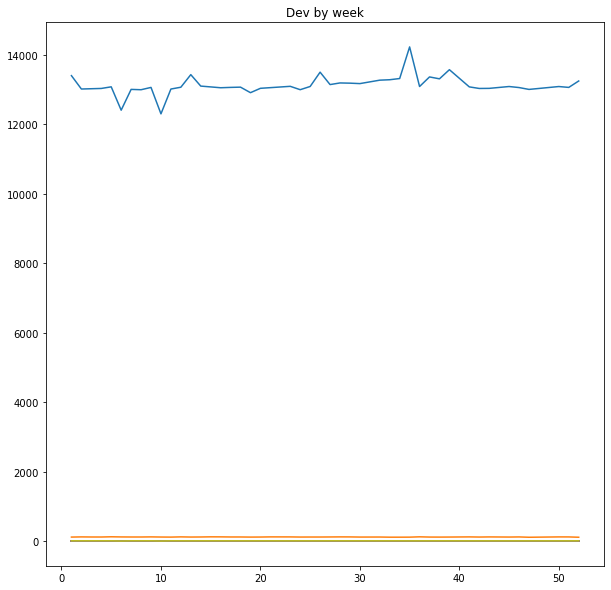

In [226]:
plt.figure(figsize=(10,10))
plt.plot(week_deviations)
plt.title('Dev by week')

There is an anamoly of data found around 45th week. that we are going to take care of further in outlier treatment

In [228]:
final_dataset_volume.to_csv('reference\data_catalog\merged_data.csv', index=False)